In [35]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
%matplotlib inline


Wczytywanie danych

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv')

In [3]:
#liczba mil przelciana w US w danym roku
df.head()

,time,airmiles
0,1937,412
1,1938,480
2,1939,683
3,1940,1052
4,1941,1385


Rysowanie wykresu

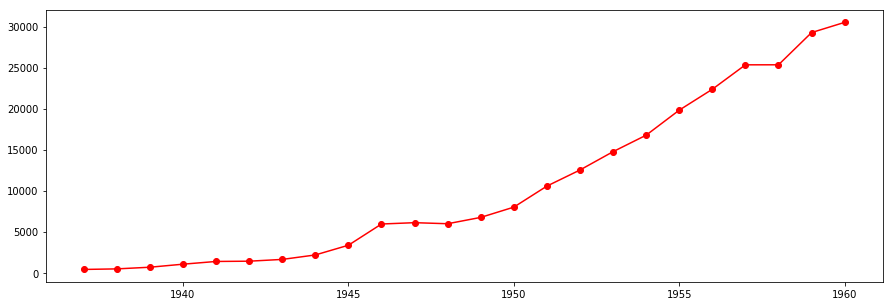

In [9]:
#wczytujemy dane na wykres, kolumna time na osi X, kolumna airmiles na osi Y
#zmiana koloru na czerwony ('r'), dodanie kropek ('o-')
plt.figure(figsize=(15, 5))
plt.plot( df.time, df.airmiles, 'o-', c='r' );

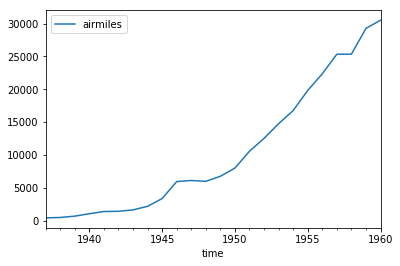

In [13]:
#rysowanie wykresu wbudowanego w pandasie
#oś X nie jest opisana, wymaga sparsowania kolumny time do formatu data_time i dodania do wykresu
#dane dodaję do zmiennej path
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv'
df = pd.read_csv(path, parse_dates=['time'], index_col='time')
df[['airmiles']].plot();

Prognoza


In [16]:
#mnożenie elementów w tablicy
[1] * 10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

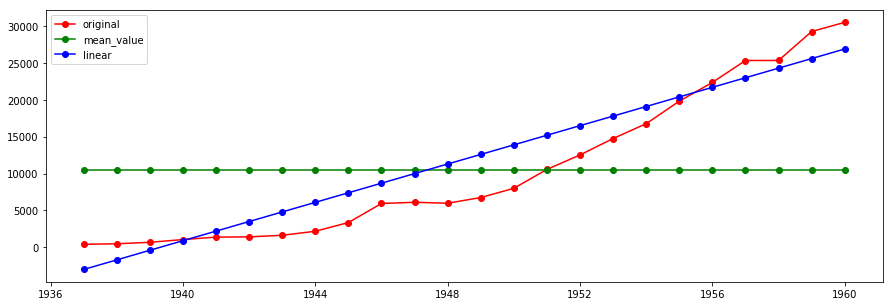

In [33]:
#definiujemy funkcję linear_func
def linear_func(airmiles, k=None, b=0):
    
    #znajdujemy wartość średnią
    mean_value = np.mean(airmiles)
    
    #dla każdej wartości zwracamy wartość średnią (if k == None)
    if k is None:
        return [mean_value] * len(airmiles)
    
    #if k =/= None
    return [idx*k+b for idx, _ in enumerate(airmiles)]

plt.figure(figsize=(15, 5))
plt.plot( df.index, df.airmiles, 'o-', c='r', label='original' );
plt.plot( df.index, linear_func(df.airmiles), 'o-', c='g', label='mean_value' );
#wprowadzamy parametry k i b
plt.plot( df.index, linear_func(df.airmiles, k=1300, b=-3000), 'o-', c='b', label='linear' );

plt.legend();


Metryka sukcesu


In [44]:
print('mean', mae (df.airmiles, linear_func(df.airmiles)))
print('linear', mae (df.airmiles, linear_func(df.airmiles, k=1300, b=-3000)))

mean 8499.305555555557
linear 2935.0833333333335
